# Hate speech and offensive language detection

![hate](hate.jpg)

Hate speech is any form of expression through which speakers intend to vilify, humiliate, or incite hatred against a group or a class of persons on the basis of race, religion, skin color sexual identity, gender identity, ethnicity, disability, or national origin.

With the advent of social networks, the phenomenon of 'hate speech' has increased despite the official policy of all main social networks that prohibits hate speech. As part of the data scientists team at Twitter (one of the main social networks through which people can share offensive or hateful tweets) our project aims to develop an algorithm that can classify a tweet (or more generally a text) as offensive (or not offensive).

![tweets_hate](twitter_hate.jpg)

A central challenge for automatic hate speech detection is the separation between hate speech from other istances of offensive language. In many cases, swear words are used in a non-offensive manner and are not part of hate speech.
For example a tweet cointaining rap lyrics with potentially offensive language should not be regarded at the same way as a tweet that directs racist slurs at another user.

The code will be developed in Python and will be integrated into an application with a graphical interface in which the user can test its operation by entering any kind of text. 
The algorithm is developed for texts in the English language only.

## Summary

blablabla

## Loading the data

In [1]:
import string
import nltk
import pandas as pd
import numpy as np
import nltk
from textstat.textstat import *
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
import nltk
nltk.download('vader_lexicon')
from wordcloud import WordCloud
%matplotlib inline
from matplotlib import pyplot as plt
from PIL import Image
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import seaborn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Louise\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
hate_speech_df = pd.read_csv("Datasets/Dataset1_labeled_data.csv")

In [3]:
hate_speech_df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [3]:
hate_speech_df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

We decided to cut off the first two columns that did not provide relevant information

In [4]:
hate_speech_df = hate_speech_df.drop(columns=['Unnamed: 0'])

In [14]:
hate_speech_df

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [15]:
hate_speech_df.describe()

,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


## Description of columns

The columns of the dataset 

- count = number of experts who coded each tweet (minimum is 3, sometimes more users coded a tweet when judgments were determined to be unreliable).

- hate_speech = number of experts who judged the tweet to be hate speech.

- offensive_language = number of experts who judged the tweet to be offensive.

- neither = number of experts who judged the tweet to be neither offensive nor non-offensive.

- class = class label for majority of experts: 0 - hate speech, 1 - offensive language, 2 - neither

In [16]:
hate_speech_df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

Text(0.5, 1.0, 'Count of Tweets per Class')

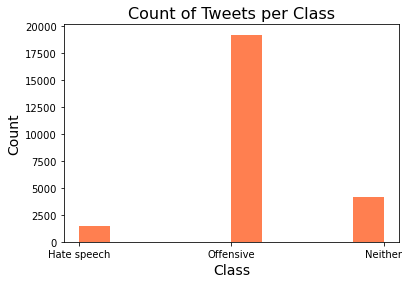

In [15]:
plt.hist(hate_speech_df['class'], color = 'coral', align='mid')
plt.ylabel('Count', fontsize=14)
col_names=['Hate speech','Offensive',"Neither"]
x_values = np.arange(0, len(col_names))


plt.xticks(x_values, col_names)
plt.xlabel('Class', fontsize=14)
plt.title('Count of Tweets per Class', fontsize = 16)

The dataset is unbalanced in favour of tweets containing offensive language compared to hate speech or tweets without any insult. <br>
</br>We will try in a later step to resolve that issue so that or predictive model will not be biased towards the most populated class.

## Preprocessing of the tweets##

We will clean the tweets by removing the punctuation & special characters, tokenize them, remove the stopwords, and stem the words left.

In [5]:
tweet=hate_speech_df.tweet

In [6]:
tweet

0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

In [6]:
#loading the stopwords library
stopwords = nltk.corpus.stopwords.words("english")

#adding other words to remove
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)

stemmer = PorterStemmer()

def preprocess(tweet):  
    
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    tweet_space = tweet.str.replace(regex_pat, ' ')

    # removal of mentions (@name)
    regex_pat = re.compile(r'@[\w\-]+')
    tweet_name = tweet_space.str.replace(regex_pat, '')

    # removal of URLs
    giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = tweet_name.str.replace(giant_url_regex, '')
    
    # removal of punctuations and numbers
    punc_remove = tweets.str.replace("[^a-zA-Z]", " ")
    # replace whitespace with a single space
    newtweet=punc_remove.str.replace(r'\s+', ' ')
    # remove leading and trailing whitespace
    newtweet=newtweet.str.replace(r'^\s+|\s+?$','')
    # replace normal numbers with numbr
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')
    # removal of capitalization
    tweet_lower = newtweet.str.lower()
    
    # tokenizing
    tokenized_tweet = tweet_lower.apply(lambda x: x.split())
    
    # removal of stopwords
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [item for item in x if item not in stopwords])
    
    # stemming of the tweets
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
    
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_p= tokenized_tweet
    
    return tweets_p

processed_tweets = preprocess(tweet)

hate_speech_df['processed_tweets'] = processed_tweets
print(hate_speech_df[["tweet","processed_tweets"]].head(10))

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   
5  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...   
6  !!!!!!"@__BrighterDays: I can not just sit up ...   
7  !!!!&#8220;@selfiequeenbri: cause I'm tired of...   
8  " &amp; you might not get ya bitch back &amp; ...   
9  " @rhythmixx_ :hobbies include: fighting Maria...   

                                    processed_tweets  
0  woman complain clean hous amp man alway take t...  
1  boy dat cold tyga dwn bad cuffin dat hoe st place  
2         dawg ever fuck bitch start cri confus shit  
3                                   look like tranni  
4     shit hear might true might faker bitch told ya  
5      shit blow claim faith somebodi still fuck hoe 

## Visualizations

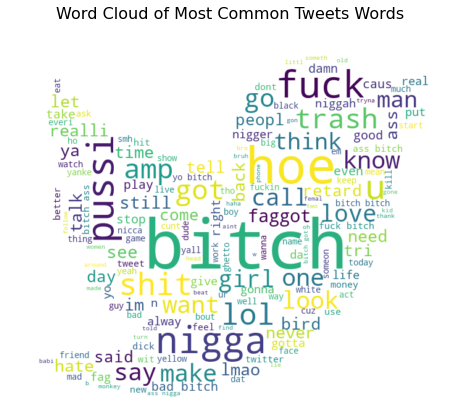

In [13]:
# visualizing which of the word is most commonly used in the twitter dataset
mask = np.array(Image.open('twitter_bird.JPG'))
all_words = ' '.join([text for text in hate_speech_df['processed_tweets'] ])
wordcloud = WordCloud(mask=mask, width=800, height=500, random_state=21, min_font_size = 10, max_font_size=110, background_color="white").generate(all_words)
#random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Most Common Tweets Words', fontsize = 16)
plt.show()

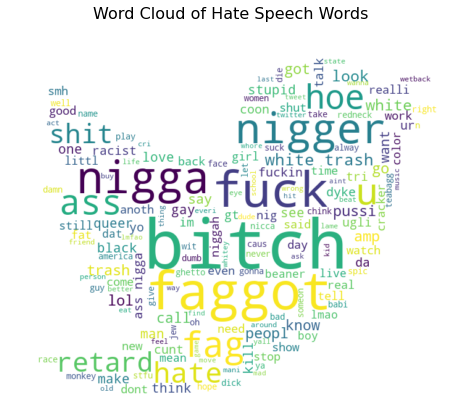

In [14]:
# visualizing which of the word is most commonly used for hate speech
hate_words = ' '.join([text for text in hate_speech_df['processed_tweets'][hate_speech_df['class'] == 0]])
wordcloud = WordCloud(mask = mask, width=800, height=500, random_state=21,min_font_size = 10, max_font_size=110, background_color="white").generate(hate_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Hate Speech Words', fontsize = 16)
plt.show()

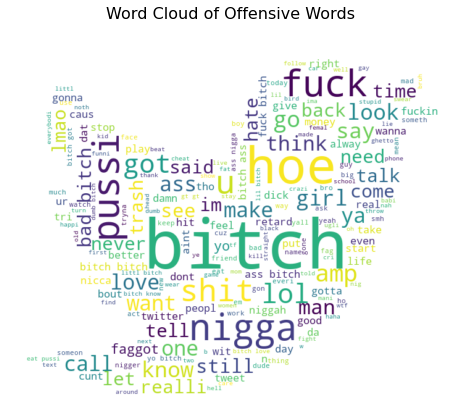

In [15]:
# visualizing which of the word is most commonly used for offensive speech
offensive_words = ' '.join([text for text in hate_speech_df['processed_tweets'][hate_speech_df['class'] == 1]])
wordcloud = WordCloud(mask = mask, width=800, height=500, random_state=21, min_font_size=10, max_font_size=110, background_color="white").generate(offensive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Offensive Words', fontsize = 16)
plt.show()

## Feature Engineering

### TF-IDF Matrix

We used the TF-IDF (term frequency–inverse document frequency) measures as features for our model. 
They are intended as weighting factors reflecting the importance of a word in a tweet among a collection of tweets. 

The term frequency represents the number of appearance of a word in a document, and the adjustment is made by the inverse document frequency. The inverse document frequency role is to give more weight to meaningful words, and reduce the weight of word not giving relevant information. 

In [94]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(hate_speech_df['processed_tweets'])


#transforming the TF_IDF matrix to an array for the future transformations
tfidf_a = tfidf.toarray()

tfidf

<24783x6441 sparse matrix of type '<class 'numpy.float64'>'
	with 189618 stored elements in Compressed Sparse Row format>

### Sentiment Analysis

We then computed a sentiment analysis on our collection of tweets, in order to use **the polarity scores** as features.

We also took into account the number of mentions in the tweet, of hashtags used, or of URLs shared. 

In [8]:
sentiment_analyzer = VS()
def count_tags(tweet_c):  
    
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    hashtag_regex = '#[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', tweet_c)
    parsed_text = re.sub(giant_url_regex, 'URLHERE', parsed_text)
    parsed_text = re.sub(mention_regex, 'MENTIONHERE', parsed_text)
    parsed_text = re.sub(hashtag_regex, 'HASHTAGHERE', parsed_text)
    return(parsed_text.count('URLHERE'),parsed_text.count('MENTIONHERE'),parsed_text.count('HASHTAGHERE'))

def sentiment_analysis(tweet):   
    sentiment = sentiment_analyzer.polarity_scores(tweet)    
    twitter_objs = count_tags(tweet)
    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound'],twitter_objs[0], twitter_objs[1],
                twitter_objs[2]]
    return features

def sentiment_analysis_array(tweets):
    features=[]
    for t in tweets:
        features.append(sentiment_analysis(t))
    return np.array(features)

sentiment_features = sentiment_analysis_array(tweet)
#Here we use the original tweets, not the pre processed ones

new_features = pd.DataFrame({'Neg':sentiment_features[:,0],'Pos':sentiment_features[:,1],'Neu':sentiment_features[:,2],'Compound':sentiment_features[:,3],
                            'url_tag':sentiment_features[:,4],'mention_tag':sentiment_features[:,5],'hash_tag':sentiment_features[:,6]})
new_features

,Neg,Pos,Neu,Compound,url_tag,mention_tag,hash_tag
0,0.000,0.120,0.880,0.4563,0.0,1.0,0.0
1,0.237,0.000,0.763,-0.6876,0.0,1.0,0.0
2,0.538,0.000,0.462,-0.9550,0.0,2.0,0.0
3,0.000,0.344,0.656,0.5673,0.0,2.0,0.0
4,0.249,0.081,0.669,-0.7762,0.0,1.0,1.0
...,...,...,...,...,...,...,...
24778,0.000,0.000,1.000,0.0000,0.0,3.0,3.0
24779,0.454,0.000,0.546,-0.8074,0.0,0.0,0.0
24780,0.000,0.219,0.781,0.4738,0.0,0.0,0.0
24781,0.573,0.000,0.427,-0.7717,0.0,0.0,0.0


### Doc2vec

We set up a doc2vec vector columns to generate a numerical representation of our data, able to capture relationships between words. 

To initiate the doc2vec we used the Distributed Bag of Words model. It ignores the context words in the tweet, but force the model to predict the probability distribution of words in a tweet given a randomly sampled word from the document.

We trained ouf model with a feature vector of dimension 5, a maximum distance of 2 between the current and predicted word within a sentence, we ignore words appearing less than 1 time in the corpus, and used 4 worker threads for the training. 



In [10]:

# Initialize the model
#The input is a list of TaggedDocument(['list','of','word'], [TAG_001]). 
#We use the indexes of the tweets as tags
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(hate_speech_df["processed_tweets"].apply(lambda x: x.split(" ")))]

# training of the model
doc2vec_model = Doc2Vec(documents,vector_size=5, window=2, min_count=1, workers=4)

# transform each document (tweet) into a vector data
doc2vec_df = hate_speech_df["processed_tweets"].apply(lambda x: doc2vec_model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
doc2vec_df

,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,0.047391,0.021130,0.092979,0.003802,0.080243
1,0.154511,-0.060921,0.167615,-0.021460,0.054241
2,-0.045321,-0.084252,0.011915,-0.036057,0.070125
3,-0.088153,-0.063945,0.051223,0.092902,-0.051686
4,0.148515,0.010028,-0.003183,0.007289,0.123545
...,...,...,...,...,...
24778,0.270949,-0.065495,0.129075,-0.031463,0.113757
24779,0.168611,0.012492,-0.022012,0.021584,0.103321
24780,0.116081,0.115310,0.042478,0.018403,0.039298
24781,0.142535,0.004082,0.088192,-0.042450,0.131319


### Enhanced textual features

We created 8 new features in regards to the textual composition of the tweets (in matter of characters/syllables or readability).

- **1** the Flesch-Kincaid Readability Age grade (FKRA): shows the required education to be able to understand a text (the higher the score the more difficult it is for a reader to understand the text)
- **2** the Flesch Reading Ease score (FRE): takes into account the number of words in a sentence and the average number of syllables per word to assess the readability score (the higher the FRE is, the easier it is to read. Thus a tweet with a high FKRA will have a lower FRE score)
- **3** syllables: total number of syllables per tweet
- **4** avg_syl: the total of syllables in a tweets divided by the total number of words
- **5** num_chars: sum of the number of characters in a tweet
- **6** num_chars_total: lenght of a tweet 
- **7** num_words: number of words in the tweet
- **8** num_unique_terms: number of words that only occur once in a tweet

In [11]:

def additional_features(tweet): 
    
    syllables = textstat.syllable_count(tweet)
    num_chars = sum(len(w) for w in tweet)
    num_chars_total = len(tweet)
    num_words = len(tweet.split())
    avg_syl = round(float((syllables+0.001))/float(num_words+0.001),4)
    num_unique_terms = len(set(tweet.split()))
    
    
    #Modified FKRA grade, where average words per sentence is : number of words/1
    FKRA = round(float(0.39 * float(num_words)/1.0) + float(11.8 * avg_syl) - 15.59,1)
    ##Modified FRE score, where sentence fixed to 1
    FRE = round(206.835 - 1.015*(float(num_words)/1.0) - (84.6*float(avg_syl)),2)
    
    add_features=[FKRA, FRE,syllables, avg_syl, num_chars, num_chars_total, num_words,
                num_unique_terms]
    return add_features

def get_additonal_feature_array(tweets):
    features=[]
    for t in tweets:
        features.append(additional_features(t))
    return np.array(features)

fFeatures = get_additonal_feature_array(processed_tweets)

df_fFeatures = pd.DataFrame(fFeatures)
df_fFeatures

,0,1,2,3,4,5,6,7
0,3.7,84.90,12.0,1.3333,50.0,50.0,9.0,9.0
1,2.6,95.69,13.0,1.1818,49.0,49.0,11.0,10.0
2,2.3,92.97,10.0,1.2500,42.0,42.0,8.0,8.0
3,1.3,91.00,4.0,1.3332,16.0,16.0,3.0,3.0
4,1.0,103.70,10.0,1.1111,46.0,46.0,9.0,8.0
...,...,...,...,...,...,...,...,...
24778,1.0,103.70,10.0,1.1111,49.0,49.0,9.0,9.0
24779,0.8,103.54,9.0,1.1250,47.0,47.0,8.0,8.0
24780,2.5,95.17,12.0,1.2000,51.0,51.0,10.0,10.0
24781,-1.4,116.15,6.0,1.0000,30.0,30.0,6.0,6.0


## Selection of the features 

We tried different combinations among our features: 
TF-IDF scores matrix, polarity scores, doc2vec vector, and additional textual features.

The better performing feature for the classification of hate speech tweets was the TF-IDF matrix, while the doc2vec vector was not very significant to improve the results of our model. 

Thus, we decided to remove the doc2vec from our set of final features, and kept the TF-IDF scores, the polarity scores, and the textual features. 


In [12]:
final_features = np.concatenate([tfidf_a,sentiment_features,fFeatures],axis=1)
final_features.shape

(24783, 6456)

In [13]:
X = pd.DataFrame(final_features)
y = hate_speech_df['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

### Balance our dataset with undersampling or oversampling

The imbalanced classes in our dataset are a problem in our predicting model, as it can lead to a bias towards the class of Offensive Language which is overpopulated compared to the two other classes. <br>
</br>To resolve this issue, we tried to manage our dataset by undersampling the most populated classes, or to oversample the minority class with the Synthetic Minority Over-Sampling Technique (SMOTE). <br>
</br>We will then compare the 2 new datasets results on our different models and choose the best performing ones. 

In [4]:
#TO DO BEFORE : conda install -c glemaitre imbalanced-learn

In [14]:
#Undersampling 
#Undersampling resamples the majority class points in the data to make them equal to the minority class points

rus = RandomUnderSampler(random_state=0)
X_resampled_under, y_resampled_under =rus.fit_resample(X_train, y_train)

In [26]:
y_resampled_under.value_counts()

1    1151
2    1151
0    1151
Name: class, dtype: int64

In [15]:
#Oversampling with SMOTE 
#Oversampling refers to the resampling of the minority class points to equal the total number of majority points
smote=SMOTE("minority", random_state=42)
X_sm,y_sm=smote.fit_resample(X_train,y_train)


In [85]:
y_sm.value_counts()

1    15338
0    15338
2     3337
Name: class, dtype: int64

## Trying different algorithms ##

To select our best performing model, we compared different classifiers:
- the logistic regression
- the random forest
- the linear SVC
- the K Neighbors classifier
- the gradient descent

Each of these models were trained and tested on the undersampled dataset, the oversampled, and the original dataset. 

We compared their accuracy scores to select the better ones that we will tune with a Grid Search to select their best parameters. 

### Logistic Regression

#### Undersampled dataset

In [40]:
lr = LogisticRegression()
lr.fit(X_resampled_under,y_resampled_under)
y_preds = lr.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc)

              precision    recall  f1-score   support

           0       0.10      0.48      0.17       279
           1       0.92      0.50      0.65      3852
           2       0.38      0.73      0.50       826

    accuracy                           0.54      4957
   macro avg       0.47      0.57      0.44      4957
weighted avg       0.79      0.54      0.60      4957

Logistic Regression, Accuracy Score: 0.538833972160581


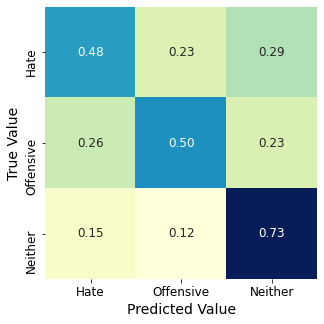

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

#### Oversampled dataset

In [54]:
lr = LogisticRegression()
lr.fit(X_sm,y_sm)
y_preds = lr.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc)

              precision    recall  f1-score   support

           0       0.12      0.58      0.20       279
           1       0.83      0.69      0.76      3852
           2       0.56      0.25      0.35       826

    accuracy                           0.61      4957
   macro avg       0.50      0.51      0.43      4957
weighted avg       0.75      0.61      0.66      4957

Logistic Regression, Accuracy Score: 0.6148880371192254


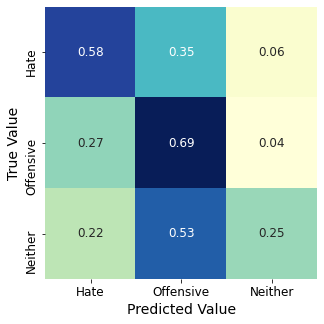

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

#### Original dataset

In [56]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       279
           1       0.81      0.97      0.88      3852
           2       0.63      0.23      0.33       826

    accuracy                           0.80      4957
   macro avg       0.48      0.40      0.41      4957
weighted avg       0.73      0.80      0.74      4957

Logistic Regression, Accuracy Score: 0.795239055880573


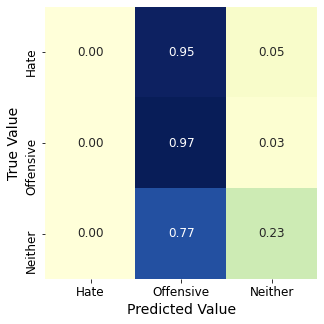

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

For the logistic regression, the accuracy score was the highest when using the original dataset. However most of the data was classified as offensive language, which does not present much interest for the classification of our tweets.

### Random Forest

#### Undersampled dataset

In [58]:
rf=RandomForestClassifier()
rf.fit(X_resampled_under,y_resampled_under)
y_preds = rf.predict(X_test)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.24      0.63      0.35       279
           1       0.97      0.80      0.88      3852
           2       0.70      0.90      0.79       826

    accuracy                           0.81      4957
   macro avg       0.64      0.78      0.67      4957
weighted avg       0.89      0.81      0.83      4957

Random Forest, Accuracy Score: 0.8069396812588259


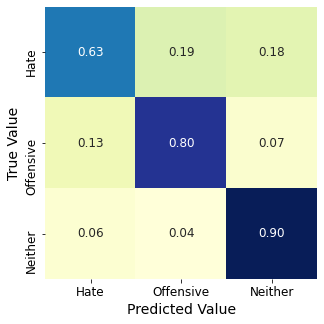

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

#### Oversampled dataset

In [60]:
rf=RandomForestClassifier()
rf.fit(X_sm,y_sm)
y_preds = rf.predict(X_test)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.50      0.27      0.35       279
           1       0.89      0.96      0.93      3852
           2       0.86      0.69      0.76       826

    accuracy                           0.88      4957
   macro avg       0.75      0.64      0.68      4957
weighted avg       0.87      0.88      0.87      4957

Random Forest, Accuracy Score: 0.8777486382892878


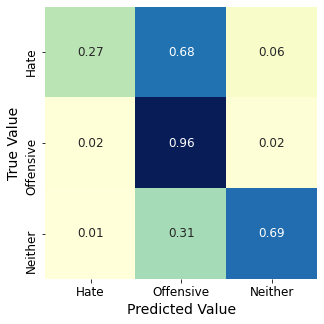

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

#### Original dataset

In [62]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_preds = rf.predict(X_test)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.51      0.06      0.11       279
           1       0.89      0.97      0.93      3852
           2       0.85      0.74      0.79       826

    accuracy                           0.88      4957
   macro avg       0.75      0.59      0.61      4957
weighted avg       0.86      0.88      0.86      4957

Random Forest, Accuracy Score: 0.8835989509784143


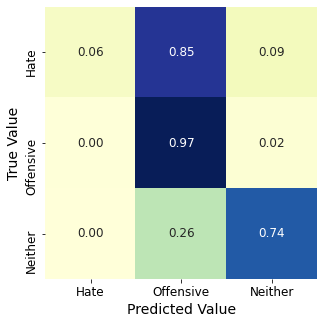

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

We have very good accuracy scores with the Random Forest Classifier. <br>
</br>The model having the best results in rightfully assigning tweets to their class is the one using the **undersampled dataset**. We will later use this model in the Grid Search to find the best parameters of this classifier to improve the accuracy results.

### Linear SVC

#### Undersampled dataset

In [64]:
lsvc =LinearSVC(random_state=20)
lsvc.fit(X_resampled_under,y_resampled_under)
y_preds = lsvc.predict(X_test)
acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Linear SVC, Accuracy Score:" ,acc3 )

              precision    recall  f1-score   support

           0       0.34      0.40      0.37       279
           1       0.97      0.74      0.84      3852
           2       0.48      0.97      0.64       826

    accuracy                           0.76      4957
   macro avg       0.60      0.71      0.62      4957
weighted avg       0.85      0.76      0.78      4957

Linear SVC, Accuracy Score: 0.7617510591083316


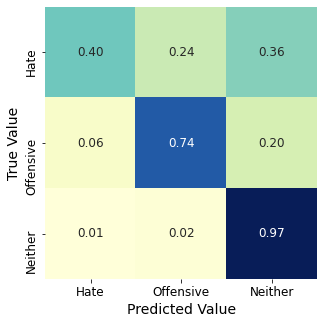

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

#### Oversampled dataset

In [66]:
lsvc =LinearSVC(random_state=20)
lsvc.fit(X_sm,y_sm)
y_preds = lsvc.predict(X_test)
acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Linear SVC, Accuracy Score:" ,acc3 )

              precision    recall  f1-score   support

           0       0.42      0.41      0.41       279
           1       0.88      0.94      0.91      3852
           2       0.85      0.56      0.68       826

    accuracy                           0.85      4957
   macro avg       0.72      0.64      0.67      4957
weighted avg       0.85      0.85      0.84      4957

Linear SVC, Accuracy Score: 0.8509178938874319


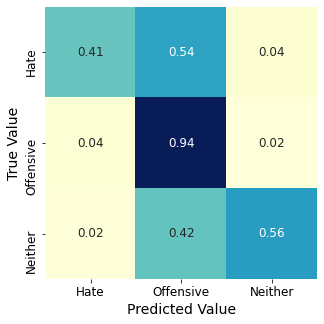

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

#### Original dataset

In [68]:
lsvc =LinearSVC(random_state=20)
lsvc.fit(X_train,y_train)
y_preds = lsvc.predict(X_test)
acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Linear SVC, Accuracy Score:" ,acc3 )

              precision    recall  f1-score   support

           0       0.35      0.53      0.42       279
           1       0.97      0.84      0.90      3852
           2       0.67      0.96      0.79       826

    accuracy                           0.85      4957
   macro avg       0.66      0.78      0.70      4957
weighted avg       0.88      0.85      0.86      4957

Linear SVC, Accuracy Score: 0.8456727859592496


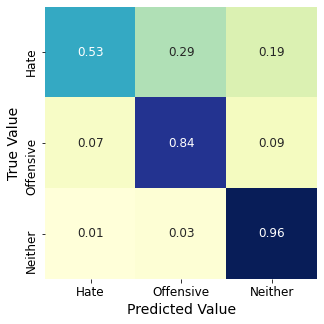

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

The Support Vector Classifier is also quite efficient in correctly classifying the tweets. <br>
</br> We will later tune the model using the **original dataset** with the Grid Search to improve its score, as this one has the most accurate results in predicting the belonging of tweets in the 3 classes. 

### K Neighbors Classifier

#### Undersampled dataset

In [70]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_resampled_under,y_resampled_under)
y_preds = neigh.predict(X_test)
acc4=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("KNN, Accuracy Score:" ,acc4 )

              precision    recall  f1-score   support

           0       0.07      0.57      0.13       279
           1       0.85      0.37      0.52      3852
           2       0.27      0.37      0.31       826

    accuracy                           0.38      4957
   macro avg       0.40      0.44      0.32      4957
weighted avg       0.71      0.38      0.46      4957

KNN, Accuracy Score: 0.38228767399636876


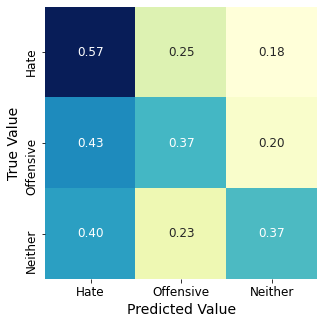

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

#### Oversampled dataset

In [72]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_sm,y_sm)
y_preds = neigh.predict(X_test)
acc4=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("KNN, Accuracy Score:" ,acc4 )

              precision    recall  f1-score   support

           0       0.07      0.42      0.12       279
           1       0.81      0.63      0.71      3852
           2       0.35      0.14      0.20       826

    accuracy                           0.53      4957
   macro avg       0.41      0.40      0.34      4957
weighted avg       0.69      0.53      0.59      4957

KNN, Accuracy Score: 0.5335888642323986


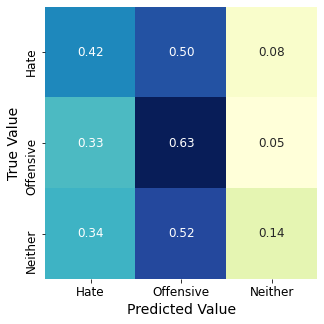

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

#### Original dataset

In [74]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
y_preds = neigh.predict(X_test)
acc4=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("KNN, Accuracy Score:" ,acc4 )

              precision    recall  f1-score   support

           0       0.09      0.08      0.08       279
           1       0.81      0.89      0.85      3852
           2       0.38      0.21      0.27       826

    accuracy                           0.73      4957
   macro avg       0.42      0.39      0.40      4957
weighted avg       0.70      0.73      0.71      4957

KNN, Accuracy Score: 0.733306435343958


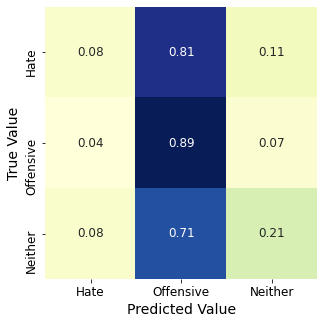

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

The K Neighbors Classifier does not appear as an interesting model for our classification task, as the accuracy and recall scores are pretty low compared to the other classifiers.

### Gradient descent

#### Undersampled dataset

In [76]:
sdgc = SGDClassifier()
sdgc.fit(X_resampled_under,y_resampled_under)
y_preds = sdgc.predict(X_test)
acc7=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM, Accuracy Score:" ,acc7 )

              precision    recall  f1-score   support

           0       0.07      0.81      0.12       279
           1       0.99      0.02      0.04      3852
           2       0.37      0.65      0.47       826

    accuracy                           0.17      4957
   macro avg       0.48      0.50      0.21      4957
weighted avg       0.83      0.17      0.12      4957

SVM, Accuracy Score: 0.17187815210812993


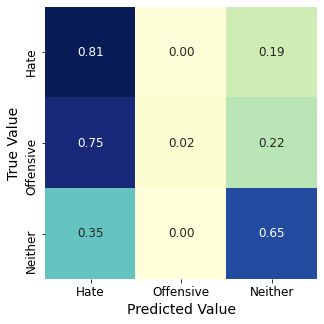

In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

#### Oversampled dataset

In [78]:
sdgc = SGDClassifier()
sdgc.fit(X_sm,y_sm)
y_preds = sdgc.predict(X_test)
acc7=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM, Accuracy Score:" ,acc7 )

              precision    recall  f1-score   support

           0       0.34      0.55      0.42       279
           1       0.82      0.94      0.87      3852
           2       0.93      0.06      0.11       826

    accuracy                           0.77      4957
   macro avg       0.69      0.52      0.47      4957
weighted avg       0.81      0.77      0.72      4957

SVM, Accuracy Score: 0.7734516844865846


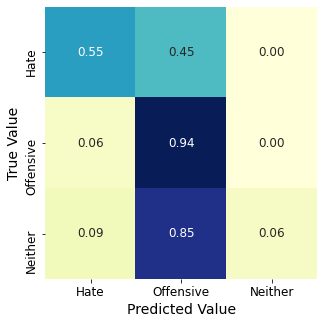

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

#### Original dataset

In [80]:
sdgc = SGDClassifier()
sdgc.fit(X_train,y_train)
y_preds = sdgc.predict(X_test)
acc7=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM, Accuracy Score:" ,acc7 )

              precision    recall  f1-score   support

           0       0.45      0.04      0.07       279
           1       0.80      0.99      0.89      3852
           2       0.88      0.18      0.30       826

    accuracy                           0.80      4957
   macro avg       0.71      0.40      0.42      4957
weighted avg       0.80      0.80      0.74      4957

SVM, Accuracy Score: 0.8043171272947347


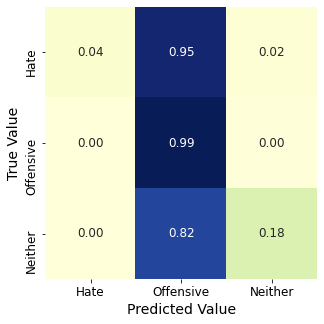

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

The Stochastic Gradient Descent, like the K Neighbors Classifier, is not an accurate model to classify our tweets and will not be exploited for our task.

# Grid Search

According to our previous testing, two models appear interesting to be used for our tweet classification task:
- the Random Forest Classifier with the undersampled dataset
- The SVC with the original dataset

They will be tuned with the Grid Search to find their best hyperparameters and improve their accuracy. 

### Tuning the SVC hyperparameters with the original dataset 

In [112]:
Tune = LinearSVC(random_state=20)

param_grid = {
    'multi_class': ['ovr', 'crammer_singer'],
    'loss' : ['squared_hinge', 'hinge'],
    'penalty': ['l1','l2'] 
}



cv = StratifiedKFold(n_splits=2, random_state = 0, shuffle = True)


scorers = {
    'precision_score': make_scorer(precision_score, average = 'micro'),
    'recall_score': make_scorer(recall_score, average = 'micro'),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score' : make_scorer(f1_score, average = 'micro')
}


In [113]:
def grid_search_wrapper(refit_score='recall_score'):


    best_clf = GridSearchCV(Tune, param_grid, scoring=scorers, refit=refit_score,
                           cv=cv, return_train_score=True, verbose = 1)
    best_clf.fit(X_train, y_train)

    # make the predictions
    y_pred = best_clf.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(best_clf.best_params_)
    
    return best_clf

In [114]:
import warnings 
warnings.filterwarnings("ignore")
grid_search = grid_search_wrapper(refit_score='recall_score') 

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Best params for recall_score
{'loss': 'squared_hinge', 'multi_class': 'crammer_singer', 'penalty': 'l1'}


In [130]:
#Implement here the parameters given by the grid search
final_model = LinearSVC(loss = 'squared_hinge', multi_class= 'crammer_singer', penalty = 'l1')
final_model.fit(X_train, y_train)

LinearSVC(multi_class='crammer_singer', penalty='l1')

#### Evaluation of the model 

In [ ]:
y_preds = final_model.predict(X_test)

In [132]:
report = classification_report( y_test, y_preds )
print(report)

              precision    recall  f1-score   support

           0       0.52      0.17      0.25       279
           1       0.93      0.96      0.95      3852
           2       0.84      0.90      0.87       826

    accuracy                           0.91      4957
   macro avg       0.76      0.68      0.69      4957
weighted avg       0.89      0.91      0.89      4957



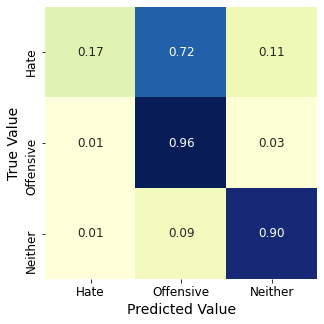

In [133]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

The model has excellent results in correctly classifying the tweets containing offenssive language or text that does not represent any type of offensive/hate speech, but it performs poorly on attributing hate speech to the right class. This model tends to classify hate speech as offensive language.

Thus we will not pursue with the SVC for our task, but we will now tune the Random Forest Classifier to find better accuracy and recall scores.

### Tuning the Random Forest Classifier hyperparameters with the undersampled dataset

In [68]:
Tune = RandomForestClassifier()


#param grid for random forest
param_grid = {
    'min_samples_split': [1, 2, 3, 10], 
    'n_estimators' : [80, 100, 300, 1000],
    'min_samples_leaf': [3, 4, 5],
    'max_features' : ['auto', 'sqrt', 'log2']
}

    
    
    
cv = StratifiedKFold(n_splits=2, random_state = 20, shuffle = True)


scorers = {
    'precision_score': make_scorer(precision_score, average = 'micro'),
    'recall_score': make_scorer(recall_score, average = 'micro'),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score' : make_scorer(f1_score, average = 'micro')
}


In [69]:
def grid_search_wrapper(refit_score='precision_score'):


    best_clf = GridSearchCV(Tune, param_grid, scoring=scorers, refit=refit_score,
                           cv=cv, return_train_score=True, verbose = 1)
    best_clf.fit(X_resampled_under,y_resampled_under)

    # make the predictions
    y_pred = best_clf.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(best_clf.best_params_)
    
    return best_clf

In [70]:
import warnings 
warnings.filterwarnings("ignore")
grid_search = grid_search_wrapper(refit_score='precision_score') 

Fitting 2 folds for each of 144 candidates, totalling 288 fits
Best params for precision_score
{'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 1000}


In [84]:
#Implement here the parameters given by the grid search
final_model = RandomForestClassifier(max_features = 'sqrt', min_samples_leaf = 3, min_samples_split = 10, n_estimators = 1000)
final_model.fit(X_resampled_under, y_resampled_under)  

RandomForestClassifier(max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=10, n_estimators=1000)

#### Evaluation of the model

In [85]:
y_preds = final_model.predict(X_test)

In [92]:
report = classification_report( y_test, y_preds )
acc_final=accuracy_score(y_test,y_preds)
print(report)
print('Accuracy score:', acc_final)

              precision    recall  f1-score   support

           0       0.27      0.61      0.37       279
           1       0.97      0.81      0.88      3852
           2       0.66      0.90      0.76       826

    accuracy                           0.81      4957
   macro avg       0.63      0.77      0.67      4957
weighted avg       0.88      0.81      0.83      4957

Accuracy score: 0.8117813193463789


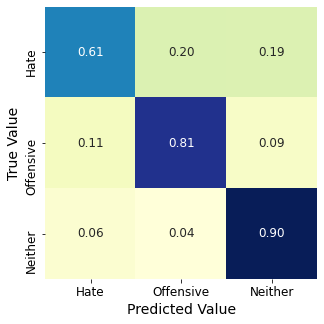

In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

The Random Forest Classifier performs well on sorting the tweets from the dataset in the three different classes, with good recall scores and an accuracy of 81%.

We will use this as our final model that will be integrated in the Dash application to detect if a sentence a user will input is hate speech, offensive language, or neither of them. 

# Preparing the integration of our model in the Dash application #

To make our model operational for the application we first need to create functions for all the preparative steps the user's input text will go through to give a prediction. Then the model will be able to translate wether his input is hate speech, offensive language, or neither of them.


These preparative functions involve: 
- the preprocessing of the tweets (removal of punctuation & special characters, stemming, tokenization,...) 
- the creation of the final features used for classification: the TF-IDF array, the sentiment analysis, and the additional textual features

Finally we define a get_predictions function that will get the input text to funnel through the previous functions and lead to the prediction. 


In [97]:
stopwords = nltk.corpus.stopwords.words("english")


other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
stemmer = PorterStemmer()


def preprocess(tweet):
    
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    tweet_space = tweet.str.replace(regex_pat, ' ')

    # removal of mentions (@name)
    regex_pat = re.compile(r'@[\w\-]+')
    tweet_name = tweet_space.str.replace(regex_pat, '')

    # removal of URLd
    giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = tweet_name.str.replace(giant_url_regex, '')
    
    # removal of punctuations and numbers
    punc_remove = tweets.str.replace("[^a-zA-Z]", " ")
    # replace whitespace with a single space
    newtweet=punc_remove.str.replace(r'\s+', ' ')
    # remove leading and trailing whitespace
    newtweet=newtweet.str.replace(r'^\s+|\s+?$','')
    # replace normal numbers with numbr
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')
    # removal of capitalization
    tweet_lower = newtweet.str.lower()
    
    # tokenizing
    tokenized_tweet = tweet_lower.apply(lambda x: x.split())
    
    # removal of stopwords
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [item for item in x if item not in stopwords])
    
    # stemming of the tweets
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
    
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_p= tokenized_tweet
    
    return tweets_p

In [98]:
def tfidf_vectorizer(tweet):
    tweet = pd.Series(tweet)
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=1, min_df=1, max_features=10000)
    #
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)
    tfidf_vectorizer.fit_transform(hate_speech_df['processed_tweets'])
    tfidf_string = tfidf_vectorizer.transform(tweet)#.fit_transform(tweet)
    #
    tfidf_array = tfidf_string.toarray()
    return tfidf_array

In [99]:
sentiment_analyzer = VS()
def count_tags(tweet_c):  
    
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    hashtag_regex = '#[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', tweet_c)
    parsed_text = re.sub(giant_url_regex, 'URLHERE', parsed_text)
    parsed_text = re.sub(mention_regex, 'MENTIONHERE', parsed_text)
    parsed_text = re.sub(hashtag_regex, 'HASHTAGHERE', parsed_text)
    return(parsed_text.count('URLHERE'),parsed_text.count('MENTIONHERE'),parsed_text.count('HASHTAGHERE'))

def sentiment_analysis_string(tweet):
    sentiment = sentiment_analyzer.polarity_scores(tweet)    
    twitter_objs = count_tags(tweet)
    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound'],twitter_objs[0], twitter_objs[1],
                twitter_objs[2]]
    return features

def sentiment_analysis_array(tweets):
    features=[]
    for t in tweets:
        features.append(sentiment_analysis_string(t))
    return np.array(features)

In [101]:
from textstat.textstat import *

def additional_features(tweet): 
    
    syllables = textstat.syllable_count(tweet)
    num_chars = sum(len(w) for w in tweet)
    num_chars_total = len(tweet)
    num_words = len(tweet.split())
    avg_syl = round(float((syllables+0.001))/float(num_words+0.001),4)
    num_unique_terms = len(set(tweet.split()))
    
    
    #Modified FKRA grade
    FKRA = round(float(0.39 * float(num_words)/1.0) + float(11.8 * avg_syl) - 15.59,1)
    #Modified FRE score, where sentence fixed to 1
    FRE = round(206.835 - 1.015*(float(num_words)/1.0) - (84.6*float(avg_syl)),2)
    
    add_features=[FKRA, FRE,syllables, avg_syl, num_chars, num_chars_total, num_words,
                num_unique_terms]
    return add_features

def get_additonal_feature_array(tweets):
    features=[]
    for t in tweets:
        features.append(additional_features(t))
    return np.array(features)

In [102]:
from sklearn.preprocessing import StandardScaler
def get_predictions(tweet):
    #Convert the string to a panda serie in order to apply the following functions 
    tweet = pd.Series(tweet)
    #Get the sentiment analysis of the un-preprocessed string
    #we need to apply this function when the string is not yet pre processed in order to keep the whole meaning
    #of the sentence, like the # for exemple 
    array_sentiment_analysis = sentiment_analysis_array(tweet)
    #Now that we have extract the sentiment from the sentence, let pre-process our tweet 
    preprocessed_tweet = preprocess(tweet)
    #We convert our string into a matrix 
    array_tfidf = tfidf_vectorizer(tweet)
    #Add additional featutre 
    additional_features = get_additonal_feature_array(tweet)
    #Concatenate all the features 
    features_tweet_test = np.concatenate([array_tfidf,array_sentiment_analysis,additional_features],axis=1)
    #Transform our array to a dataframe 
    df = pd.DataFrame(features_tweet_test)
    #df = df.iloc[:, :1].values
    #We apply our model to our tweet 
    pred = final_model.predict(df)
    #Re code the labels 
    if pred == 0:
        return "Hate speech"
    elif pred == 1:
        return "Offensive language"
    elif pred == 2:
        return "Neither"
    else:
        return "No label"
    return pred

In [151]:
tweet_test = "go to sleep hoe"

In [152]:
get_predictions(tweet_test)

'Offensive language'

In [133]:
tweet_test_2 = "you so fucking nice"
get_predictions(tweet_test_2)

'Neither'

In [159]:
tweet_test_3 = "fuck the Mexican fishes" #sorry Mexican fishes 
get_predictions(tweet_test_3)

'Hate speech'